# SARIMAX
- SARIMAX Supports exogenous regressor variables
- Endogenous Variables are dependent on many outsid influences
- Exogenous Variables are not effected by influences

## Imports

In [9]:
# Linear Algebram, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Date'>

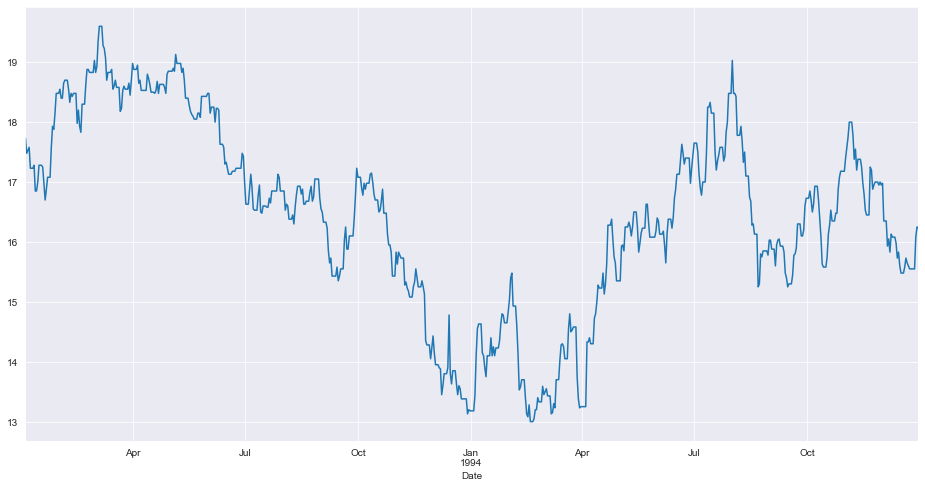

In [10]:
oil_df = pd.read_csv("./datasets/brent-daily-csv.csv", index_col="Date", parse_dates=True)
oil_df = oil_df[(oil_df.index > "1993-01-01") & (oil_df.index < "1995-01-01")]
oil_df = oil_df.asfreq("D")
oil_df = oil_df.fillna(method="ffill")
oil_df["Price"].plot(figsize=(16, 8))

## Seasonal Component

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

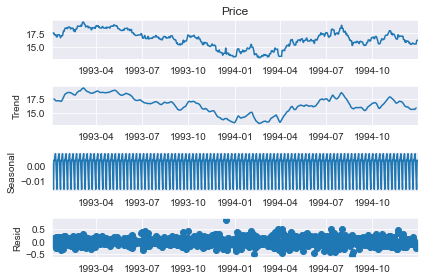

In [19]:
res = seasonal_decompose(oil_df["Price"])
res.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

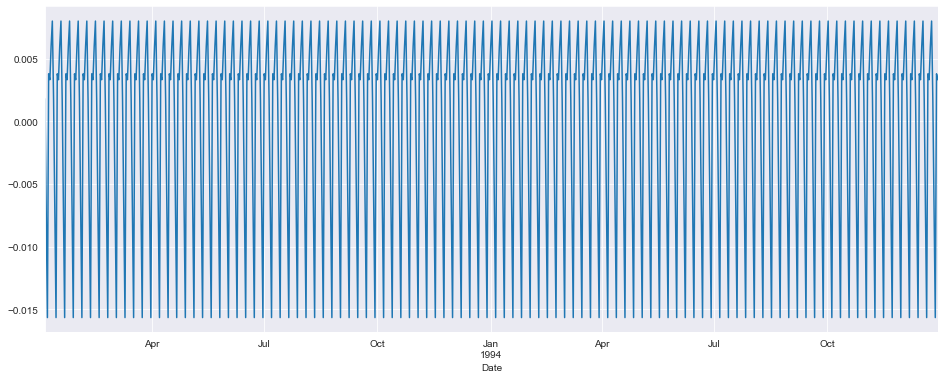

In [20]:
res.seasonal.plot(figsize=(16, 6))

## Auto ARIMA

In [21]:
auto_arima(oil_df["Price"], m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-182.933, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-189.475, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-191.586, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-184.864, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-188.961, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-200.746, Time=0.70 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-190.202, Time=0.18 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=-203.825, Time=0.87 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=-204.213, Time=0.43 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=-199.334, Time=0.31 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=-206.954, Time=1.79 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=-192.707, Time=0.37 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=-206.599, Time=1.18 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  726
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood                 109.426
Date:                            Mon, 25 Oct 2021   AIC                           -208.851
Time:                                    18:37:38   BIC                           -185.920
Sample:                                         0   HQIC                          -200.001
                                            - 726                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5589      0.191     -2.922      0.003      -0.934      -0.184
ma.L1          0.6644      0.178      3.736      0.000       0.316       1.013
ar.S.L7       -0.0854      0.032     -2.670      0.008      -0.148      -0.023
ar.S.L14      -0.1492      0.031     -4.839      0.000      -0.210      -0.089
sigma2         0.0433      0.001     29.855      0.000       0.040       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               356.57
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make Predictions

In [26]:
train_df = oil_df.iloc[:580]
test_df = oil_df.iloc[580:]

In [27]:
model = SARIMAX(oil_df["Price"], order=(1, 1, 1), seasonal_order=(2, 0, 0, 7))
res = model.fit()

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = res.predict(start, end).rename("Prediction")

<AxesSubplot:xlabel='Date'>

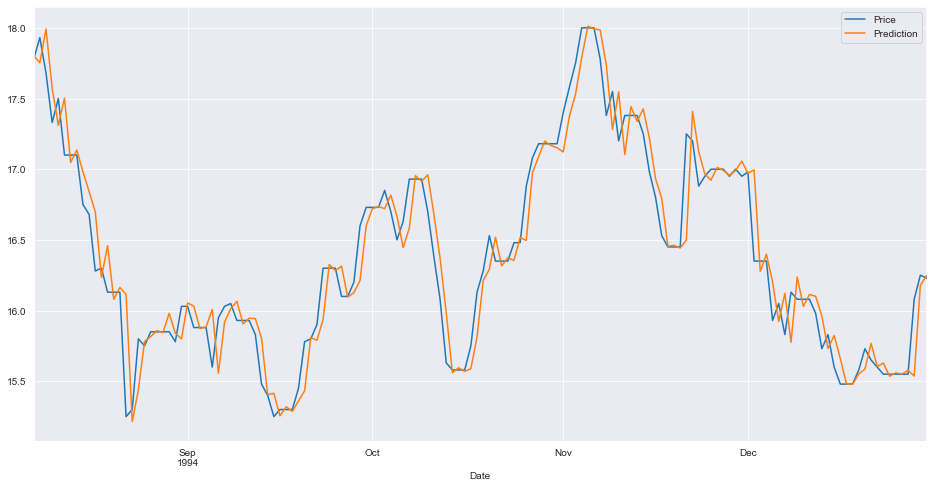

In [28]:
test_df["Price"].plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)

In [29]:
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error :", np.sqrt(mean_squared_error(test_df["Price"], prediction)))

Root Mean Squared Error : 0.2111089411538937
